In [258]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [270]:
X, y = shuffle(X, y)

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [271]:
latent_dim = 20

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      #layers.Dense(500, activation='sigmoid'),
      layers.Dense(100, activation='relu'),
      layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(100, activation='relu'),
      #layers.Dense(500, activation='sigmoid'),
      layers.Dense(10257, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [272]:
autoencoder.compile(optimizer='adam', loss='mse')

In [273]:
autoencoder.fit(X_train, X_train,
                epochs=15,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_train = autoencoder.encoder(X_train).numpy()
encoded_train.shape

Epoch 1/15
42/42 [==============================] - 2s 34ms/step - loss: 1.0052 - val_loss: 0.9714
Epoch 2/15
42/42 [==============================] - 1s 31ms/step - loss: 0.9151 - val_loss: 0.9363
Epoch 3/15
42/42 [==============================] - 1s 31ms/step - loss: 0.8849 - val_loss: 0.9109
Epoch 4/15
42/42 [==============================] - 1s 32ms/step - loss: 0.8605 - val_loss: 0.8914
Epoch 5/15
42/42 [==============================] - 1s 31ms/step - loss: 0.8428 - val_loss: 0.8800
Epoch 6/15
42/42 [==============================] - 1s 31ms/step - loss: 0.8302 - val_loss: 0.8720
Epoch 7/15
42/42 [==============================] - 1s 31ms/step - loss: 0.8195 - val_loss: 0.8655
Epoch 8/15
42/42 [==============================] - 1s 32ms/step - loss: 0.8109 - val_loss: 0.8613
Epoch 9/15
42/42 [==============================] - 1s 32ms/step - loss: 0.8041 - val_loss: 0.8585
Epoch 10/15
42/42 [==============================] - 1s 32ms/step - loss: 0.7985 - val_loss: 0.8569
Epoch 11/

(1323, 20)

In [274]:
encoded_test = autoencoder.encoder(X_test).numpy()
encoded_test.shape

(568, 20)

In [291]:
from sklearn.svm import SVC
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score


svc_classifier = SVC()
svc_classifier.fit(encoded_train, y_train)
print(svc_classifier.score(encoded_test, y_test))
my_predictions = svc_classifier.predict(encoded_test)

print(matthews_corrcoef(y_test, my_predictions))
f1_score(y_test, my_predictions, average='weighted')

0.7517605633802817
0.6741137717354123


0.7480762564685598

60/60 [==============================] - 0s 3ms/step


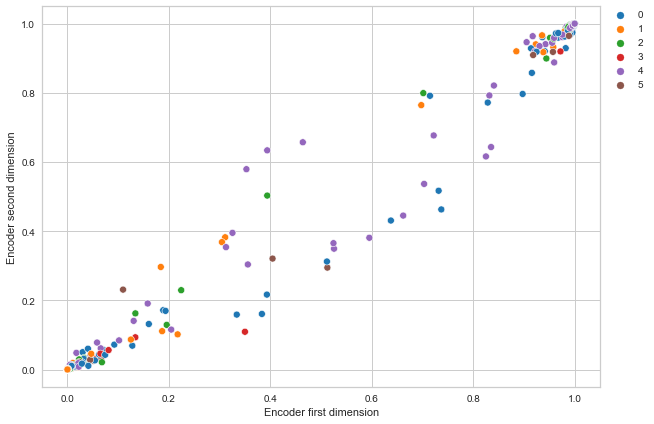

In [253]:
z = autoencoder.encoder.predict(X)

import seaborn as sns

plt.figure(figsize=(10, 7))

sns.scatterplot(x=z[:,0],
                y=z[:,1],
                hue=y, palette='tab10')

plt.xlabel("Encoder first dimension")
plt.ylabel("Encoder second dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [386]:
%%time
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

parameters = {'svc__C':[0.1,0.5,1,1.5,2,3], 
              'svc__gamma':('scale','auto')}
clf = GridSearchCV(estimator=pipe_lr, param_grid=parameters, n_jobs=-1, cv=10)
clf.fit(encoded_train, y_train)
y_pred = clf.predict(encoded_test)
cr = classification_report(y_test, y_pred)
print(cr)
scores_df = pd.DataFrame(clf.cv_results_)
scores_df = scores_df.sort_values(by=['rank_test_score']).reset_index(drop='index')
scores_df

C:\Users\cbroe\anaconda3\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\cbroe\anaconda3\lib\site-packages\numpy\core\_methods.py:243: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       135
           1       0.68      0.73      0.70        44
           2       0.94      0.78      0.85        40
           3       0.92      0.88      0.90        40
           4       0.73      0.76      0.74        92
           5       0.62      0.29      0.39        28

    accuracy                           0.77       379
   macro avg       0.77      0.71      0.73       379
weighted avg       0.77      0.77      0.76       379

Wall time: 8.6 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.834300,0.013508,0.026062,0.000564,1,scale,"{'svc__C': 1, 'svc__gamma': 'scale'}",0.796053,0.690789,0.728477,0.774834,0.748344,0.728477,0.721854,0.761589,0.715232,0.768212,0.743386,0.030335,1
1,0.828079,0.011674,0.026124,0.001900,1,auto,"{'svc__C': 1, 'svc__gamma': 'auto'}",0.796053,0.690789,0.721854,0.774834,0.748344,0.728477,0.721854,0.761589,0.715232,0.768212,0.742724,0.030723,2
2,0.822658,0.010833,0.025712,0.000797,1.5,auto,"{'svc__C': 1.5, 'svc__gamma': 'auto'}",0.802632,0.717105,0.754967,0.761589,0.741722,0.708609,0.715232,0.741722,0.708609,0.748344,0.740053,0.027923,3
3,0.633572,0.106884,0.014335,0.001757,3,auto,"{'svc__C': 3, 'svc__gamma': 'auto'}",0.789474,0.697368,0.761589,0.781457,0.768212,0.701987,0.721854,0.741722,0.682119,0.741722,0.738750,0.035158,4
4,0.821723,0.009094,0.025284,0.000482,2,auto,"{'svc__C': 2, 'svc__gamma': 'auto'}",0.789474,0.717105,0.748344,0.768212,0.761589,0.708609,0.715232,0.735099,0.695364,0.748344,0.738737,0.028235,5
5,0.836147,0.007825,0.025988,0.001576,2,scale,"{'svc__C': 2, 'svc__gamma': 'scale'}",0.776316,0.717105,0.748344,0.768212,0.761589,0.708609,0.715232,0.741722,0.695364,0.748344,0.738084,0.026080,6
6,0.831365,0.009891,0.025257,0.000666,1.5,scale,"{'svc__C': 1.5, 'svc__gamma': 'scale'}",0.789474,0.717105,0.748344,0.761589,0.735099,0.708609,0.715232,0.748344,0.708609,0.748344,0.738075,0.024936,7
7,0.841036,0.008448,0.024160,0.002550,3,scale,"{'svc__C': 3, 'svc__gamma': 'scale'}",0.789474,0.697368,0.761589,0.768212,0.768212,0.701987,0.728477,0.741722,0.675497,0.741722,0.737426,0.034643,8
8,0.872179,0.007031,0.026513,0.000724,0.5,scale,"{'svc__C': 0.5, 'svc__gamma': 'scale'}",0.789474,0.684211,0.721854,0.754967,0.741722,0.708609,0.715232,0.741722,0.708609,0.735099,0.730150,0.027852,9
9,0.864055,0.012404,0.026860,0.001661,0.5,auto,"{'svc__C': 0.5, 'svc__gamma': 'auto'}",0.789474,0.684211,0.721854,0.754967,0.741722,0.708609,0.708609,0.741722,0.708609,0.735099,0.729488,0.028274,10


In [301]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import DroppingCurve
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




df1 = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample", low_memory=False).T
df2 = pd.read_excel("Optimized_32_Gene_BRCA_Signature.xlsx", sheet_name=1, index_col="Hugo_Symbol")
df1 = df1[df1.index.str.contains("MB")]
df1 = df1[~df1.Subtype.str.contains("NC")]
species = df1.pop("Subtype")
df1 = df1.astype('float64')
df1 = df1.T
df = pd.merge(df1, df2, how='inner', left_on='Sample', right_index=True)
df = df.T


#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
inv_lut = {v: k for k, v in lut.items()}
#species.unique()
numbers = species.map(lut)


X = df.values
y = np.array(numbers)

In [327]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import matthews_corrcoef



X, y = shuffle(X, y)

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#n_components = 3

pipe_lr = make_pipeline(PowerTransformer(),
                        #PCA(n_components=n_components),
                        #MLPClassifier(max_iter=1000),
                        #KNeighborsClassifier(),
                        #GaussianProcessClassifier(),
                        #DecisionTreeClassifier(),
                        #RandomForestClassifier(),
                        #GaussianNB(),
                        #AdaBoostClassifier(),
                        #QuadraticDiscriminantAnalysis(),
                        XGBClassifier(),
                        #SVC(C=1, kernel='rbf', gamma='scale', probability=True)
                       )

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')
matthews_corrcoef(y_test, y_pred)
#cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
#cvs = cross_val_score(pipe_lr, X, y, cv=cv, scoring='f1_weighted').tolist()
#df_knn[n_components] = pd.DataFrame(cvs)
# Specify what model you are going to be using 
#my_classifier = KNeighborsClassifier()
#my_classifier = SVC()
#my_classifier = GaussianProcessClassifier()
#my_classifier = DecisionTreeClassifier()
#my_classifier = RandomForestClassifier()
#my_classifier = MLPClassifier(max_iter=1000)
#my_classifier = GaussianNB()
#my_classifier = AdaBoostClassifier()
#my_classifier = QuadraticDiscriminantAnalysis()
#my_classifier = XGBClassifier()

# Fit the data to the model using the training data
#my_classifier.fit(X_train, y_train)

# Create predictions for the y variable based on the x test data
#my_predictions = my_classifier.predict(X_test)

# Check the accuracy of the predictions of the model
#print(accuracy_score(y_test, my_predictions))

Test accuracy: 0.784


0.717289997910891

In [456]:
results = pipe_lr.predict_proba(X_test)[0]

# gets a dictionary of {'class_name': probability}
prob_per_class_dictionary = dict(zip(pipe_lr.classes_, results))
prob_per_class_dictionary

{0: 0.853674101948131,
 1: 0.0010084549636027982,
 2: 0.0004696986925046479,
 3: 0.00014773612554565502,
 4: 0.14286063732851234,
 5: 0.0018393709417035265}

In [467]:
results = pipe_lr.predict_proba(X_test)

array([[8.53674102e-01, 1.00845496e-03, 4.69698693e-04, 1.47736126e-04,
        1.42860637e-01, 1.83937094e-03],
       [4.07476510e-04, 9.96877617e-01, 1.23254412e-03, 8.66304145e-04,
        1.60096513e-04, 4.55961260e-04],
       [1.31556165e-03, 2.87231416e-03, 9.11366559e-01, 6.89184761e-02,
        5.65542073e-04, 1.49615474e-02],
       ...,
       [9.63798467e-01, 5.59754088e-04, 2.88478293e-03, 2.60448969e-04,
        3.83355381e-04, 3.21131913e-02],
       [7.67374830e-01, 3.54084121e-03, 3.23079275e-02, 3.72850702e-03,
        8.77007705e-02, 1.05347124e-01],
       [3.38814445e-01, 8.06504707e-02, 2.03566202e-03, 1.52330019e-03,
        5.72681666e-01, 4.29445666e-03]])

In [460]:
from collections import Counter
Counter(species)

Counter({'LumA': 675,
         'Her2': 218,
         'claudin-low': 199,
         'Basal': 199,
         'LumB': 460,
         'Normal': 140})

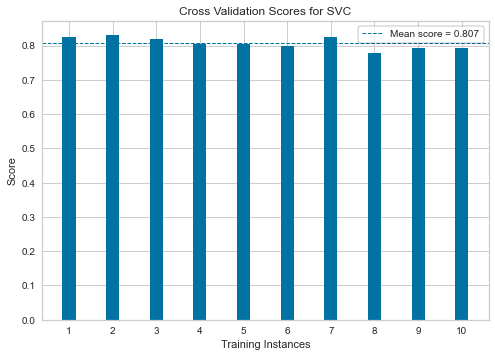

<AxesSubplot:title={'center':'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [443]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

# Load the classification dataset
#X, y = load_occupancy()

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True)

# Instantiate the classification model and visualizer
#model = MultinomialNB()
visualizer = CVScores(pipe_lr, cv=cv, scoring='accuracy')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

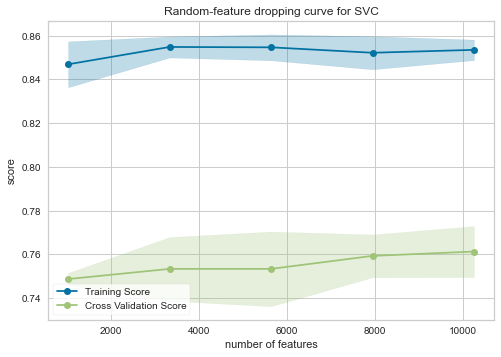

<AxesSubplot:title={'center':'Random-feature dropping curve for SVC'}, xlabel='number of features', ylabel='score'>

In [152]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits

from yellowbrick.model_selection import DroppingCurve

# Load dataset
#X, y = load_digits(return_X_y=True)

# Initialize visualizer with estimator
visualizer = DroppingCurve(pipe_lr)

# Fit the data to the visualizer
visualizer.fit(X_train, y_train)
# Finalize and render the figure
visualizer.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import DroppingCurve
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample", low_memory=False).T
df = df[df.index.str.contains("MB")]
df = df[~df.Subtype.str.contains("NC")]
species = df.pop("Subtype")
df = df.astype('float64')

0.6886543535620053
0.6388595564941922


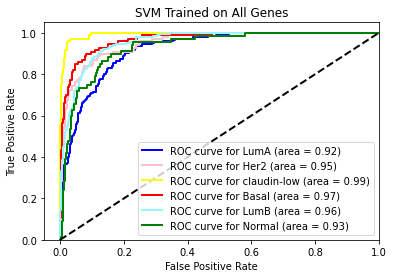

In [1]:
# ROC for all genes
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
df = df.dropna()
species = df.pop("CLAUDIN_SUBTYPE")

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
#species.unique()
numbers = species.map(lut)

y = np.array(numbers)
#df = df.dropna()
array = df.to_numpy().astype('int32')
array = array + abs(df.min().min())
normalized_array = stats.zscore(array, axis=None, nan_policy='omit')
X = normalized_array

# KNN: supervised learning (uses y)

# This specifies what fraction of the data is used for the testing portion as opposed to the training portion of the data
test_fraction = 0.2

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction)

# Specify what model you are going to be using 
my_classifier = neighbors.KNeighborsClassifier()


# Fit the data to the model using the training data
my_classifier.fit(X_train, y_train)

# Create predictions for the y variable based on the x test data
my_predictions = my_classifier.predict(X_test)

# Check the accuracy of the predictions of the model
print(accuracy_score(y_test, my_predictions))

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

#iris = datasets.load_iris()
X = normalized_array
y = np.array(numbers)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on All Genes')
plt.legend(loc="lower right")
#plt.savefig("All_Genes_SVM_ROC_ML.svg", dpi=1200)
plt.show()

0.7335092348284961
0.6754617414248021


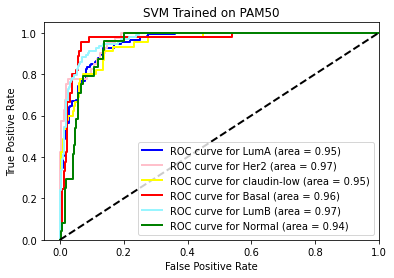

In [2]:
# ROC for PAM50
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
df = df.dropna()
species = df.pop("CLAUDIN_SUBTYPE")
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
df4 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name="Sheet2")
df4 = df4.set_index("Hugo_Symbol")
df5 = pd.merge(df, df4, left_index=True, right_index=True)
df5 = df5.astype(dtype="float64")
df5 = df5.T

# Add unique numbers to subtypes
# Normalize data

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
#species.unique()
numbers = species.map(lut)

y = np.array(numbers)
#df = df.dropna()
array = df5.to_numpy().astype('int32')
array = array + abs(df.min().min())
normalized_array = stats.zscore(array, axis=None, nan_policy='omit')
X = normalized_array

# KNN: supervised learning (uses y)

# This specifies what fraction of the data is used for the testing portion as opposed to the training portion of the data
test_fraction = 0.2

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction)

# Specify what model you are going to be using 
my_classifier = neighbors.KNeighborsClassifier()


# Fit the data to the model using the training data
my_classifier.fit(X_train, y_train)

# Create predictions for the y variable based on the x test data
my_predictions = my_classifier.predict(X_test)

# Check the accuracy of the predictions of the model
print(accuracy_score(y_test, my_predictions))

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

#iris = datasets.load_iris()
X = normalized_array
y = np.array(numbers)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on PAM50')
plt.legend(loc="lower right")
plt.savefig("PAM50_SVM_ROC_ML.svg", dpi=1200)
plt.show()

0.41952506596306066
0.18997361477572558


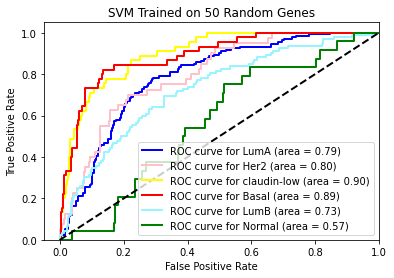

In [3]:
# ROC for Random 50 genes
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
df = df.dropna()
species = df.pop("CLAUDIN_SUBTYPE")
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
#df4 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name="Sheet2")
#df4 = df4.set_index("Hugo_Symbol")
#df5 = pd.merge(df, df4, left_index=True, right_index=True)
#df5 = df5.astype(dtype="float64")
#df5 = df5.T

df = df.sample(n=50, random_state=0)
df = df.astype(dtype="float64")
df = df.T
#df = df.dropna()

# Add unique numbers to subtypes
# Normalize data

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
#species.unique()
numbers = species.map(lut)

y = np.array(numbers)
#df = df.dropna()
array = df.to_numpy().astype('int32')
array = array + abs(df.min().min())
normalized_array = stats.zscore(array, axis=None, nan_policy='omit')
X = normalized_array

# KNN: supervised learning (uses y)

# This specifies what fraction of the data is used for the testing portion as opposed to the training portion of the data
test_fraction = 0.2

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction)

# Specify what model you are going to be using 
my_classifier = neighbors.KNeighborsClassifier()


# Fit the data to the model using the training data
my_classifier.fit(X_train, y_train)

# Create predictions for the y variable based on the x test data
my_predictions = my_classifier.predict(X_test)

# Check the accuracy of the predictions of the model
print(accuracy_score(y_test, my_predictions))

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

X = normalized_array
y = np.array(numbers)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on 50 Random Genes')
plt.legend(loc="lower right")
plt.savefig("Random_50_SVM_ROC_ML.svg", dpi=1200)
plt.show()

0.5800524934383202
0.5538057742782152


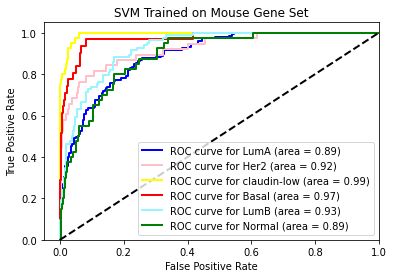

In [4]:
# ROC for mouse amp/del/deg
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
species = df.pop("CLAUDIN_SUBTYPE")
# Colors in order are LumA, Her2, Claudin-low, basal, LumB, Normal
lut = dict(zip(species.unique(), ["blue","pink","yellow","red","#98F5FF","green"]))
row_colors = species.map(lut)
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
df4 = pd.read_csv("Myc_Genes_Amp_Del_Differentially_Expressed.csv")
df4 = df4.set_index("Hugo_Symbol")
df5 = pd.merge(df, df4, left_index=True, right_index=True)
df5 = df5.astype(dtype="float64")
df5 = df5.T

# Add unique numbers to subtypes
# Normalize data

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
#species.unique()
numbers = species.map(lut)

y = np.array(numbers)
#df = df.dropna()
array = df5.to_numpy().astype('int32')
array = array + abs(df.min().min())
normalized_array = stats.zscore(array, axis=None, nan_policy='omit')
X = normalized_array

# KNN: supervised learning (uses y)

# This specifies what fraction of the data is used for the testing portion as opposed to the training portion of the data
test_fraction = 0.2

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction)

# Specify what model you are going to be using 
my_classifier = neighbors.KNeighborsClassifier()


# Fit the data to the model using the training data
my_classifier.fit(X_train, y_train)

# Create predictions for the y variable based on the x test data
my_predictions = my_classifier.predict(X_test)

# Check the accuracy of the predictions of the model
print(accuracy_score(y_test, my_predictions))

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

#iris = datasets.load_iris()
X = normalized_array
y = np.array(numbers)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on Mouse Gene Set')
plt.legend(loc="lower right")
plt.savefig("Mouse_Gene_Set_SVM_ROC_ML.svg", dpi=1200)
plt.show()

0.6253298153034301
0.46701846965699206


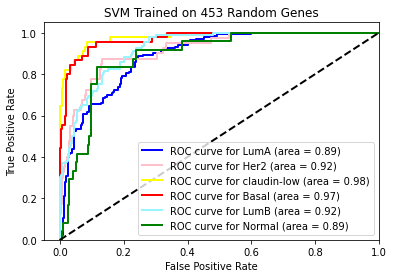

In [8]:
# ROC for Random 453 genes
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
df = df.dropna()
species = df.pop("CLAUDIN_SUBTYPE")
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
#df4 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name="Sheet2")
#df4 = df4.set_index("Hugo_Symbol")
#df5 = pd.merge(df, df4, left_index=True, right_index=True)
#df5 = df5.astype(dtype="float64")
#df5 = df5.T

df = df.sample(n=453, random_state=1)
df = df.astype(dtype="float64")
df = df.T

# Add unique numbers to subtypes
# Normalize data

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
#species.unique()
numbers = species.map(lut)

y = np.array(numbers)
#df = df.dropna()
array = df.to_numpy().astype('int32')
array = array + abs(df.min().min())
normalized_array = stats.zscore(array, axis=None, nan_policy='omit')
X = normalized_array

# KNN: supervised learning (uses y)

# This specifies what fraction of the data is used for the testing portion as opposed to the training portion of the data
test_fraction = 0.2

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction)

# Specify what model you are going to be using 
my_classifier = neighbors.KNeighborsClassifier()


# Fit the data to the model using the training data
my_classifier.fit(X_train, y_train)

# Create predictions for the y variable based on the x test data
my_predictions = my_classifier.predict(X_test)

# Check the accuracy of the predictions of the model
print(accuracy_score(y_test, my_predictions))

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

#iris = datasets.load_iris()
X = normalized_array
y = np.array(numbers)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on 453 Random Genes')
plt.legend(loc="lower right")
plt.savefig("Random_504_SVM_ROC_ML.svg", dpi=1200)
plt.show()

In [699]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df1 = pd.read_csv("data_mrna_agilent_microarray.txt", sep="\t")
df3 = df1.T
df2 = pd.read_csv("data_clinical_patient.txt", sep="\t", skiprows=4, usecols=[0,15])
df2 = df2.set_index('PATIENT_ID')
df = pd.merge(df3, df2, left_index=True, right_index=True)
df = df.dropna()
species = df.pop("CLAUDIN_SUBTYPE")
df = df.T
df = df.set_index(df1["Hugo_Symbol"])
df4 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name="Sheet2")
df4 = df4.set_index("Hugo_Symbol")
df5 = pd.merge(df, df4, left_index=True, right_index=True)
df5 = df5.astype(dtype="float64")
df5 = df5[~df5.index.duplicated(keep='first')]
df6 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name="Sheet3")
df6 = df6.set_index("Hugo_Symbol")
df7 = pd.merge(df6, df5, left_index=True, right_index=True)
df7 = df7.T

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
inv_lut = {v: k for k, v in lut.items()}
#species.unique()
numbers = species.map(lut)

y = np.array(numbers)
#df = df.dropna()
array = df7.to_numpy().astype('int32')
array = array + abs(df.min().min())
normalized_array = stats.zscore(array, axis=None, nan_policy='omit')
X = normalized_array

test_fraction = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction)
my_classifier = SVC()
my_classifier.fit(X_train, y_train)
my_predictions = my_classifier.predict(X_test)
print(accuracy_score(y_test, my_predictions))

# Make new prediction variable for MMTV-Myc tumors

0.7704485488126649


C:\Users\cbroe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

0.6406743940990516


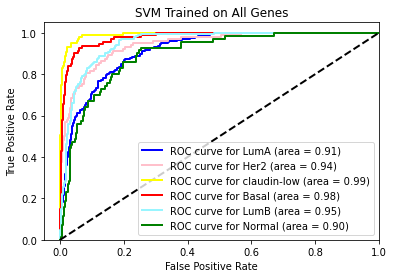

In [1]:
# ROC for mouse amp/del/deg
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample").T
df = df[df.index.str.contains("MB")]
species = df.pop("Subtype")
df = df.astype('float64')

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
#species.unique()
numbers = species.map(lut)

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

#iris = datasets.load_iris()
X = df.values
y = np.array(numbers)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on All Genes')
plt.legend(loc="lower right")
#plt.savefig("All_Genes_SVM_ROC_ML.svg", dpi=1200)
plt.show()

C:\Users\cbroe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251

0.5388655462184874


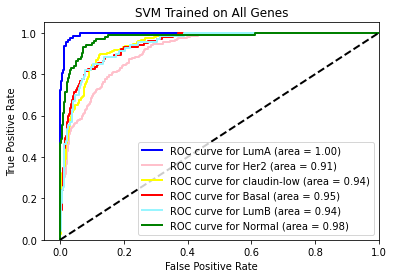

In [28]:
# ROC for mouse amp/del/deg
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from matplotlib.patches import Patch

df = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression_2.csv", index_col="Sample").T
df = df[df.index.str.contains("MB")]
species = df.pop("Subtype")
df = df.astype('float64')

#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
#species.unique()
numbers = species.map(lut)

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

#iris = datasets.load_iris()
X = df.values
y = np.array(numbers)

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True,
                                 random_state=0))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(classifier.score(X_test, y_test))

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
subtypes = ["LumA","Her2","claudin-low","Basal","LumB","Normal"]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(["blue","pink","yellow","red","#98F5FF","green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for '+subtypes[i]+' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Trained on All Genes')
plt.legend(loc="lower right")
#plt.savefig("All_Genes_SVM_ROC_ML.svg", dpi=1200)
plt.show()

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import DroppingCurve
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import matthews_corrcoef



df1 = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample", low_memory=False).T
df2 = pd.read_excel("Optimized_32_Gene_BRCA_Signature.xlsx", sheet_name=1, index_col="Hugo_Symbol")
df1 = df1[df1.index.str.contains("MB")]
df1 = df1[~df1.Subtype.str.contains("NC")]
species = df1.pop("Subtype")
df1 = df1.astype('float64')
df1 = df1.T
df = pd.merge(df1, df2, how='inner', left_on='Sample', right_index=True)
df = df.T


#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
inv_lut = {v: k for k, v in lut.items()}
#species.unique()
numbers = species.map(lut)


X = df.values
y = np.array(numbers)


X, y = shuffle(X, y)

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# group / ensemble of models
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('RF', RandomForestClassifier()))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('MLP', MLPClassifier(max_iter=1000)))
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
y_pred_prob = vot_soft.predict_proba(X_test)


print(accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))


df1 = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample", low_memory=False).T
df2 = pd.read_excel("Optimized_32_Gene_BRCA_Signature.xlsx", sheet_name=1, index_col="Hugo_Symbol")
df1 = df1[~df1.index.str.contains("MB")]
df1 = df1[~df1.Subtype.str.contains("NC")]
species = df1.pop("Subtype")
df1 = df1.astype('float64')
df1 = df1.T
df = pd.merge(df1, df2, how='inner', left_on='Sample', right_index=True)
df = df.T

X = df.values


my_predictions = vot_soft.predict(X)
prob_predictions = vot_soft.predict_proba(X)

df = df.reset_index()
df3 = pd.DataFrame()
df3.insert(0, "Histological_Subtype", df["index"])
df3.insert(1, "Human_Predicted_Subtype", pd.DataFrame(my_predictions))
df3["Human_Predicted_Subtype"] = df3["Human_Predicted_Subtype"].map(inv_lut)
#df3 = df3.reset_index()
df4 = pd.DataFrame()
df4 = pd.concat([df3, pd.DataFrame(prob_predictions)], axis=1)
df4 = df4.rename(columns={0:"LumA Prob", 1:"Her2 Prob", 2:"Claudin-low Prob", 3:"Basal Prob", 4:"LumB Prob", 5:"Normal Prob"})
#df4 = df[["Histological_Subtype", "Human_Predicted_Subtype"]].copy()
df4#.to_csv("ML_Results1.csv")

0.8151408450704225
0.7583255332774977


,Histological_Subtype,Human_Predicted_Subtype,LumA Prob,Her2 Prob,Claudin-low Prob,Basal Prob,LumB Prob,Normal Prob
0,Neu_315,LumA,0.513371,0.022548,0.144848,0.017083,0.024131,0.278020
1,Neu_380,LumA,0.416386,0.020724,0.165563,0.007798,0.019353,0.370175
2,Neu_540,LumA,0.363898,0.052185,0.246086,0.006676,0.014543,0.316611
3,Neu_770,LumA,0.446714,0.020442,0.398342,0.009855,0.003591,0.121056
4,Neu_772,LumA,0.715579,0.057991,0.091559,0.005553,0.019583,0.109735
...,...,...,...,...,...,...,...,...
261,PyMT_3716,LumA,0.877086,0.023838,0.018525,0.009120,0.029782,0.041649
262,PyMT_3720,LumA,0.761709,0.049431,0.025027,0.001279,0.128539,0.034015
263,PyMT_3723,claudin-low,0.025097,0.125710,0.387525,0.377776,0.051748,0.032145
264,PyMT_3746,claudin-low,0.014112,0.097090,0.633196,0.182846,0.024835,0.047920


In [14]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
#sns.heatmap(conf, annot=True, cmap='magma', fmt='g')
conf

array([[188,   0,   2,   0,  12,   1],
       [  7,  46,   0,   1,  11,   0],
       [  2,   1,  39,  14,   1,   3],
       [  1,   5,   5,  48,   0,   1],
       [ 14,   5,   0,   0, 119,   0],
       [ 16,   0,   3,   0,   0,  23]], dtype=int64)

In [1]:
# PAM50
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score
from yellowbrick.model_selection import DroppingCurve
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


df1 = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample", low_memory=False).T
df2 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name=2, index_col="Hugo_Symbol")
df1 = df1[df1.index.str.contains("MB")]
df1 = df1[~df1.Subtype.str.contains("NC")]
species = df1.pop("Subtype")
df1 = df1.astype('float64')
df1 = df1.T
df = pd.merge(df1, df2, how='inner', left_on='Sample', right_index=True)
df = df.T


#species = df.pop("CLAUDIN_SUBTYPE")
lut = dict(zip(species.unique(), [0, 1, 2, 3, 4, 5, 6]))
inv_lut = {v: k for k, v in lut.items()}
#species.unique()
numbers = species.map(lut)


X = df.values
y = np.array(numbers)


X, y = shuffle(X, y)

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# group / ensemble of models
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('RF', RandomForestClassifier()))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('MLP', MLPClassifier(max_iter=1000)))
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
y_pred_prob = vot_soft.predict_proba(X_test)


print(accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))


df1 = pd.read_csv("Post_ComBat_Human_Mouse_Gene_Expression.csv", index_col="Sample", low_memory=False).T
df2 = pd.read_excel("PAM_50_Genes.xlsx", sheet_name=2, index_col="Hugo_Symbol")
df1 = df1[~df1.index.str.contains("MB")]
df1 = df1[~df1.Subtype.str.contains("NC")]
species = df1.pop("Subtype")
df1 = df1.astype('float64')
df1 = df1.T
df = pd.merge(df1, df2, how='inner', left_on='Sample', right_index=True)
df = df.T

X = df.values


my_predictions = vot_soft.predict(X)
prob_predictions = vot_soft.predict_proba(X)

df = df.reset_index()
df3 = pd.DataFrame()
df3.insert(0, "Histological_Subtype", df["index"])
df3.insert(1, "Human_Predicted_Subtype", pd.DataFrame(my_predictions))
df3["Human_Predicted_Subtype"] = df3["Human_Predicted_Subtype"].map(inv_lut)
#df3 = df3.reset_index()
df4 = pd.DataFrame()
df4 = pd.concat([df3, pd.DataFrame(prob_predictions)], axis=1)
df4 = df4.rename(columns={0:"LumA Prob", 1:"Her2 Prob", 2:"Claudin-low Prob", 3:"Basal Prob", 4:"LumB Prob", 5:"Normal Prob"})
#df4 = df[["Histological_Subtype", "Human_Predicted_Subtype"]].copy()
df4#.to_csv("ML_Results1.csv")

0.8045774647887324
0.7447403100271779


,Histological_Subtype,Human_Predicted_Subtype,LumA Prob,Her2 Prob,Claudin-low Prob,Basal Prob,LumB Prob,Normal Prob
0,Neu_315,LumA,0.563684,0.029266,0.252317,0.016308,0.023005,0.115419
1,Neu_380,LumA,0.512154,0.024650,0.297925,0.010280,0.025595,0.129396
2,Neu_540,LumA,0.527836,0.036445,0.341931,0.014234,0.013448,0.066106
3,Neu_770,LumA,0.597404,0.028102,0.236162,0.002500,0.013381,0.122452
4,Neu_772,LumA,0.728866,0.062622,0.099610,0.009125,0.022018,0.077759
...,...,...,...,...,...,...,...,...
261,PyMT_3716,LumA,0.711937,0.075990,0.031043,0.018649,0.073250,0.089130
262,PyMT_3720,Her2,0.319529,0.321469,0.023464,0.006774,0.290908,0.037857
263,PyMT_3723,Her2,0.027870,0.372950,0.215816,0.201663,0.144343,0.037358
264,PyMT_3746,claudin-low,0.018743,0.329182,0.378091,0.215818,0.023801,0.034365


In [367]:
X, y = shuffle(X, y)

# Calls the sklearn function that separates data into random subsets for later training and testing for both the x and y variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# group / ensemble of models
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('RF', RandomForestClassifier()))
estimator.append(('XGB', XGBClassifier()))
estimator.append(('MLP', MLPClassifier(max_iter=1000)))
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
y_pred_prob = vot_soft.predict_proba(X_test)

accuracy_score_list.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred, average='weighted'))
matthews_corrcoef_list.append(matthews_corrcoef(y_test, y_pred))
print('done')

done


In [370]:
df = pd.DataFrame({"Accuracy Score":accuracy_score_list, "F1 Score":f1_score_list, "Matthews Corr Coef Score":matthews_corrcoef_list})

In [372]:
df.to_csv("ML_Scoring_Metrics_Soft_Voting.csv")